# Investigation into the Time Lag between Educaiton Improvement and Decreasing Poverty Levels

Previous investigation showed that education enrolment rates and poverty levels are correlated.

The next step is to see what timefame has the highest correlation affect, e.g. after how many years does a change in education rate does the poverty rate decrease (or vice verse).

This is one step towards cause and effect.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
# Ensure charts are displayed in the notebook without the need to "call"
%matplotlib inline

In [4]:
# Define path
path = r'C:\Users\Michael\Desktop\Career Foundry\02 Data Immersion Course\06 Advanced Analytics and Dashboard Design'
# import data
df = pd.read_csv(os.path.join(path,'00 Data', 'World Bank Cleaned', 'eco_edu_pov.csv'))

In [5]:
list(df)

['Unnamed: 0',
 'Country Name',
 'Year',
 'GDP per capita (constant 2015 US$)',
 'GDP per capita growth (annual %)',
 'GNI per capita (constant 2015 US$)',
 'GNI per capita growth (annual %)',
 'Adolescents out of school (% of lower secondary school age)',
 'Adolescents out of school, female (% of female lower secondary school age)',
 'Adolescents out of school, male (% of male lower secondary school age)',
 'Children out of school (% of primary school age)',
 'Children out of school, female (% of female primary school age)',
 'Children out of school, male (% of male primary school age)',
 'Government expenditure on education, total (% of GDP)',
 'Primary completion rate, female (% of relevant age group)',
 'Primary completion rate, male (% of relevant age group)',
 'Primary completion rate, total (% of relevant age group)',
 'School enrollment, primary (% net)',
 'School enrollment, primary, female (% net)',
 'School enrollment, primary, male (% net)',
 'School enrollment, secondary (

### The program will cycle through all the avaiable years making a list for the poverty rate and the education rate in each year. Once all the data has been fed into the list the correlation will be calculated.

In [28]:
correlation_df = pd.DataFrame()

# i is the year for the poverty level
for i in range(1996, 2022):

    # j is the year for the education rate
    # empty the list of correlations
    education_correl = []
    # print(education_correl)
    for j in range(1996, 2022):
        # find the correlation between the povert and the educaiton in the two years
        
        # correlation = poverty_list.corr(education_list)
        # print(str(i)+' '+str(j))
        pov_frame = df.loc[df['Year'] == i, 'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)']
        pov_frame = pov_frame.reset_index()
        
        edu_frame = df.loc[df['Year'] == j, 'School enrollment, secondary (% net)']
        edu_frame = edu_frame.reset_index()
        
        education_correl.append(pov_frame['Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)'].corr(edu_frame['School enrollment, secondary (% net)']))
        # print(education_correl)
    
    # add the list of correlations as a new column in the correlation df
    correlation_df[i] = education_correl
correlation_df = pd.DataFrame(correlation_df)
correlation_df.index += 1996
print(correlation_df)

          1996      1997      1998      1999      2000      2001      2002  \
1996 -0.739183 -0.736307 -0.731965 -0.726650 -0.720732 -0.725884 -0.736134   
1997 -0.740980 -0.737805 -0.733592 -0.728016 -0.721988 -0.727075 -0.737451   
1998 -0.743623 -0.740258 -0.736311 -0.730780 -0.724848 -0.729964 -0.740603   
1999 -0.745009 -0.741422 -0.737635 -0.731940 -0.725937 -0.731104 -0.741943   
2000 -0.748079 -0.744194 -0.740693 -0.734970 -0.729558 -0.735129 -0.746297   
2001 -0.755671 -0.751792 -0.748505 -0.743064 -0.737988 -0.743914 -0.754840   
2002 -0.758207 -0.754067 -0.750633 -0.745497 -0.740713 -0.747115 -0.757971   
2003 -0.762840 -0.758506 -0.755006 -0.750749 -0.746468 -0.753435 -0.764625   
2004 -0.765474 -0.761132 -0.757566 -0.753737 -0.749816 -0.757173 -0.768390   
2005 -0.769927 -0.765720 -0.762319 -0.758134 -0.754159 -0.761467 -0.772360   
2006 -0.770922 -0.766390 -0.762801 -0.759363 -0.755453 -0.762634 -0.774010   
2007 -0.768986 -0.763441 -0.759492 -0.757517 -0.753848 -0.761171

<Axes: xlabel='Education Measure Year', ylabel='Poverty Measure Year'>

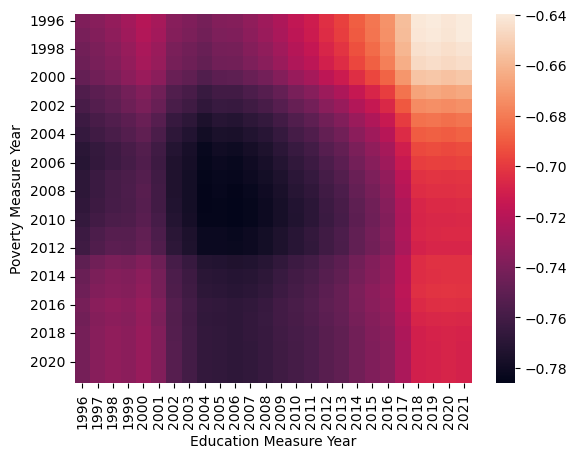

In [29]:
correl_map = sns.heatmap(correlation_df)
correl_map.set_xlabel('Education Measure Year')
correl_map.set_ylabel('Poverty Measure Year')
correl_map

In [43]:
path = r'C:\Users\Michael\Desktop\Career Foundry\02 Data Immersion Course\06 Advanced Analytics and Dashboard Design\00 Data'
correlation_df.to_csv(os.path.join(path, 'correlations.csv'), index = True)

In [85]:
difference_correls = pd.read_csv(os.path.join(path, 'difference corr avg.csv'))

In [86]:
difference_correls.head()

,-25,-24,-23,-22,-21,-20,-19,-18,-17,-16,...,16,17,18,19,20,21,22,23,24,25
0,-0.742495,-0.739168,-0.737244,-0.736644,-0.735521,-0.73596,-0.738819,-0.741977,-0.745669,-0.749808,...,-0.689463,-0.681717,-0.673482,-0.665023,-0.656644,-0.648374,-0.64275,-0.641433,-0.640865,-0.639584


<Axes: xlabel='Education Measure Lead (Years)'>

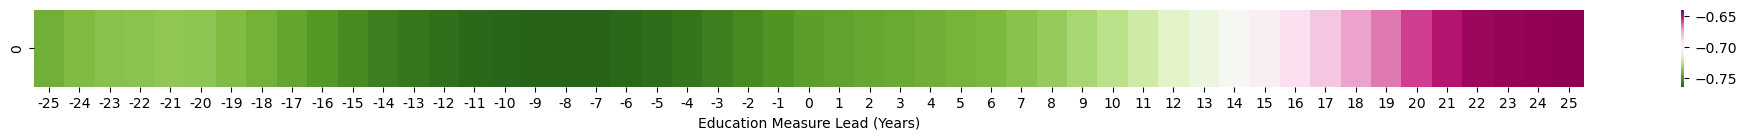

In [99]:
f,ax = plt.subplots(figsize=(25,1))
#corr = sns.heatmap(sub.corr(), annot = True, ax = ax)


correl_diff_map = sns.heatmap(difference_correls, annot = False, ax = ax, cmap="PiYG_r")
correl_diff_map.set_xlabel('Education Measure Lead (Years)')
correl_diff_map